# Regression Algorithms in a Notebook

This notebook is dedicated to the exercises of week 3 in the Machine Learning Challenge organised by ING:
https://radu-enuca.gitbook.io/ml-challenge/

During this exercise, we are going to explore the **Bosten house price** dataset that comes with scikit-learn. We use this dataset to explore different regression algorithms that fall under the umberella of supervised learning.
Hope you enjoy it as much as I did:)

Our analysis will be organised as follows:
1. Preliminary analysis
2. Linear regression
3. Ridge regression
4. Support Vector Regression (SVG)
5. Regression Tree

In [21]:
#load dependencies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from scipy import linalg
from sklearn import svm
import numpy as np
import statsmodels.api as sm
pd.set_option('display.max_columns', None)

## 1. Preliminary analysis

As being said, for this exercise we use the Bosten house price dataset:

In [4]:
boston = datasets.load_boston()
type(boston)
# Dataset is of type Bunch, as we learned in this week's exercises

print(boston.keys())
print(boston.DESCR)
print('Data has shape: ', boston.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX

In [22]:
# Create dataframes to leverage pandas functionalities
df_X = pd.DataFrame(boston.data, columns=boston.feature_names)
df_y = pd.DataFrame(boston.target, columns=['PRICE'])

In [23]:
# First, we provide some summary statistics of our dependent variable: house prices
df_y.info()
df_y.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRICE   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


,PRICE
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


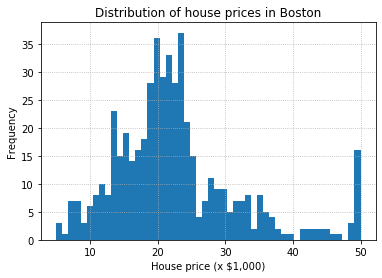

In [24]:
df_y.hist(bins=50)
plt.grid(axis='both', linestyle='dotted')
plt.title('Distribution of house prices in Boston')
plt.xlabel('House price (x $1,000)')
plt.ylabel('Frequency')
plt.show()

Interesting! It looks like the price variable is censored from above at $50,000.
Normally we have to treat this, but for this exercise wel leave it as is.

Let's have a look at our features:

In [25]:
df_X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [26]:
df_X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [27]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


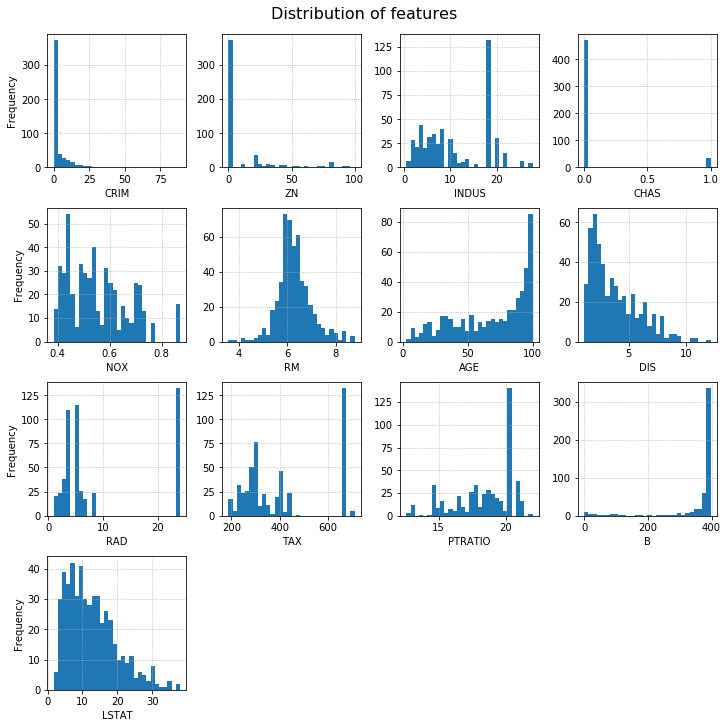

In [28]:
# Pandas hist wrapper could be used for a quick histogram, but I wanted experiment in order to have more control
# The following page was useful to understand the subplot api:
# https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html

fig1, ax1 = plt.subplots(nrows=4, ncols=4, constrained_layout=True, figsize=(10, 10))
for i in ax1[-1, -3:]:
    i.axis('off')
fig1.suptitle('Distribution of features', fontsize=16)
for i, feature in enumerate(df_X.columns):
    r, c = int(i/4), i % 4
    ax1[r, c].hist(df_X[feature], bins=30)
    ax1[r, c].grid(axis='both', linestyle='dotted')
    ax1[r, c].set_xlabel(feature)
    # ax1[r, c].set_title(feature)
    if c == 0:
        ax1[r, c].set_ylabel('Frequency')

What is the relation between all our features and our dependent variable (target variable):

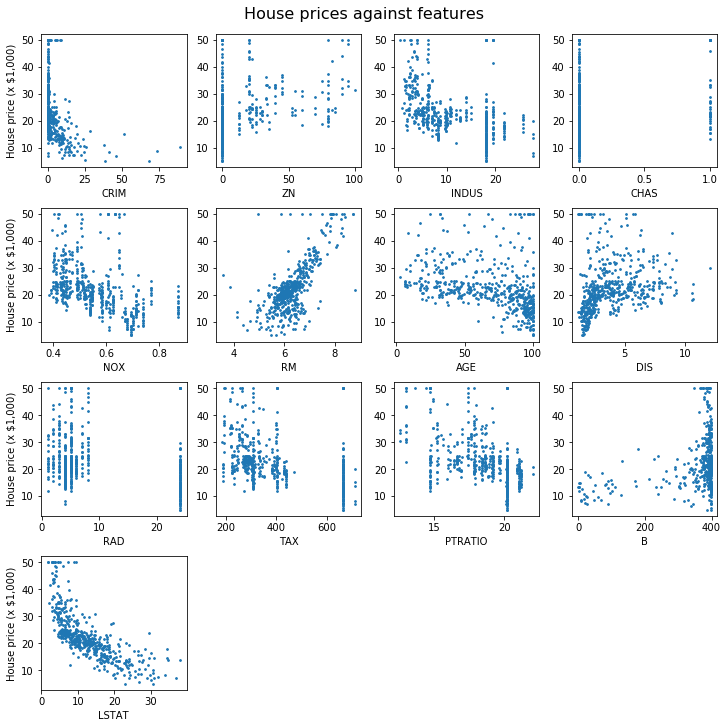

In [29]:
fig2, ax2 = plt.subplots(nrows=4, ncols=4, constrained_layout=True, figsize=(10, 10))
for i in ax2[-1, -3:]:
    i.axis('off')
fig2.suptitle('House prices against features', fontsize=16)
for i, feature in enumerate(df_X.columns):
    r, c = int(i/4), i % 4
    ax2[r, c].scatter(df_X[feature], df_y, s=3)
    ax2[r, c].set_xlabel(feature)
    # ax2[r, c].set_title(feature)
    if c == 0:
        ax2[r, c].set_ylabel('House price (x $1,000)')

It might be interesting to look at quadratic effects. As an exercise, we are going to include a quadratic effect of the feature RM.

In [30]:
df_X['RM2'] = df_X['RM']**2

Now we are going to split our data in a train and a test dataset. We fit our models on the train dataset and providing some goodness of fit measures (R^2 and RMSE) of this model based on our test dataset.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(354, 14) (354, 1) (152, 14) (152, 1)


## 2. Linear Regression

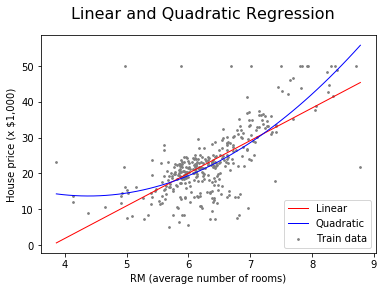

In [33]:
# First we only look at one feature: The average number of rooms per dwelling (RM)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train['RM'].values.reshape(-1, 1), y_train)
ps_lin = np.linspace(min(X_train['RM']), max(X_train['RM'])).reshape(-1, 1)
plot_linear_line = linear_reg.predict(ps_lin)

# Quadratic Regression
quad_reg = LinearRegression()
quad_reg.fit(X_train[['RM', 'RM2']], y_train)
ps_quad = pd.DataFrame(ps_lin, columns=['Single'])
ps_quad['Squared'] = ps_lin**2
plot_quad_line = quad_reg.predict(ps_quad)

# plot the results
fig3, ax3 = plt.subplots()
ax3.scatter(X_train['RM'], y_train, s=3, color='grey')
ax3.plot(ps_lin, plot_linear_line, color='red', linewidth=1)
ax3.plot(ps_lin, plot_quad_line, color='blue', linewidth=1)
ax3.set_xlabel('RM (average number of rooms)')
ax3.set_ylabel('House price (x $1,000)')
fig3.suptitle('Linear and Quadratic Regression', fontsize=16)
ax3.legend(['Linear', 'Quadratic', 'Train data'])

In [35]:
# How well does it fit on the train data
print('R^2 for linear model on train data: ', linear_reg.score(X_train['RM'].values.reshape(-1, 1), y_train))
print('R^2 for quad model on train data: ', quad_reg.score(X_train[['RM', 'RM2']], y_train))

R^2 for linear model on train data:  0.4878892853275991
R^2 for quad model on train data:  0.5354624414575766


In [38]:
print('But the big question: How well does it fit on the test data:')
score_lin = linear_reg.score(X_test['RM'].values.reshape(-1, 1), y_test)
y_pred_lin = linear_reg.predict(X_test['RM'].values.reshape(-1, 1))
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
print('For the linear model we have:')
print('R^2: {}'.format(score_lin))
print('RMSE: {}'.format(rmse_lin))

print('')
score_quad = quad_reg.score(X_test[['RM', 'RM2']], y_test)
y_pred_quad = quad_reg.predict(X_test[['RM', 'RM2']])
rmse_quad = np.sqrt(mean_squared_error(y_test, y_pred_quad))
print('For the quadratic model we have:')
print('R^2: {}'.format(score_quad))
print('RMSE: {}'.format(rmse_quad))

But the big question: How well does it fit on the test data:
For the linear model we have:
R^2: 0.4584649934303068
RMSE: 6.352279094771659

For the quadratic model we have:
R^2: 0.5685094410898874
RMSE: 5.670246665948632


Now, instead of only using RM as a feature, we are going to use all features available in the data (inc. RM squared)

In [39]:
reg_all = LinearRegression()
reg_all.fit(X_train.values, y_train.values)
print(reg_all.coef_)

# Statsmodels might provide a better overview of the regression output of OLS
# For statsmodels we add the constant manually
X_train_sm = X_train.copy()
X_train_sm['Const'] = 1
reg_all_sm = sm.OLS(y_train, X_train_sm).fit()
print(reg_all_sm.summary())

# Or manually calculate the OLS estimator beta_hat
# beta_hat = np.dot(np.linalg.inv(np.dot(X_train_sm.T, X_train_sm)), np.dot(X_train_sm.T, y_train))


[[-1.55623535e-01  3.01882871e-02  8.70448673e-02  2.51373330e+00
  -1.60201274e+01 -2.79775718e+01 -9.46790079e-03 -1.09913132e+00
   2.26885017e-01 -8.75787293e-03 -7.37483307e-01  9.66063459e-03
  -5.88466819e-01  2.46565400e+00]]
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     95.66
Date:                Sun, 23 Feb 2020   Prob (F-statistic):          1.74e-108
Time:                        12:02:44   Log-Likelihood:                -1011.5
No. Observations:                 354   AIC:                             2053.
Df Residuals:                     339   BIC:                             2111.
Df Model:                          14                                         
Covariance Type:            nonrobust                  

From the output we observe that the features ZN, INDUS and AGE are not statistically significant at a 5% level: 
For further analysis we might want to remove them to get a more parsimonious model
We can consider the Ridge regression as well, wich penalizes additional parameters.

How well does our model fit our test dataset?

For the model with all the features we have:
R^2: 0.8021529826869492
RMSE: 3.839556446891333


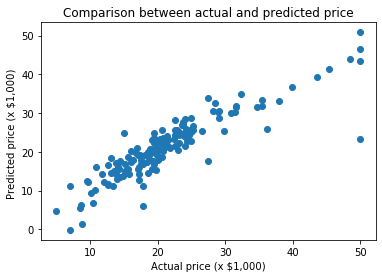

In [40]:
score_all = reg_all.score(X_test, y_test)
y_pred_all = reg_all.predict(X_test)
rmse_all = np.sqrt(mean_squared_error(y_test, y_pred_all))
print('For the model with all the features we have:')
print('R^2: {}'.format(score_all))
print('RMSE: {}'.format(rmse_all))

plt.scatter(y_test, y_pred_all)
plt.xlabel("Actual price (x $1,000)")
plt.ylabel("Predicted price (x $1,000) ")
plt.title("Comparison between actual and predicted price")
plt.show()

## 3. Ridge regression

Remember from the lessen that a higher value of alpha applies more restrictions to the parameters.
For this example we go with alpha=0.5. Normally however, we would like to do some cross validation to find the best value for a.

In [41]:
reg_ridge = Ridge(alpha=0.5)
reg_ridge.fit(X_train, y_train)
y_pred_ridge = reg_ridge.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
score_ridge = reg_ridge.score(X_test, y_test)
print('For the Ridge regression with all the features we have:')
print('R^2: {}'.format(score_ridge))
print('RMSE: {}'.format(rmse_ridge))

For the Ridge regression with all the features we have:
R^2: 0.7919023901182052
RMSE: 3.937765494867221


What if we limit the amount of features to those that were only statistically significant?

In [42]:
X_train_lm = X_train.copy().drop(['ZN', 'INDUS', 'AGE'], axis=1)
X_test_lm = X_test.copy().drop(['ZN', 'INDUS', 'AGE'], axis=1)
reg_ridge_lm = Ridge(alpha=1)
reg_ridge_lm.fit(X_train_lm, y_train)
y_pred_ridge_lm = reg_ridge_lm.predict(X_test_lm)
rmse_ridge_lm = np.sqrt(mean_squared_error(y_test, y_pred_ridge_lm))
score_ridge_lm = reg_ridge_lm.score(X_test_lm, y_test)
print('For the limited Ridge regression with less features we have:')
print('R^2: {}'.format(score_ridge_lm))
print('RMSE: {}'.format(rmse_ridge_lm))

For the limited Ridge regression with less features we have:
R^2: 0.7761088499568369
RMSE: 4.084461122347214


Even though we penalized more parameters and dropped some variables that were statistically insignificant, we still find that our OLS model with all features fits the test data the best, which might be evidence that we are not yet fitting to the noise

## 4. Support Vector Regression (SVR)

In [44]:
reg_svr = svm.SVR()
# There are three implementations in sklearn: SVR, NuSVR and LinearSVR. We use the first as an example.
reg_svr.fit(X_train, y_train.values.ravel())
score_svr = reg_svr.score(X_test, y_test)
y_pred_svr = reg_svr.predict(X_test)
rmse_svr_all = np.sqrt(mean_squared_error(y_test, y_pred_svr))
print('For the SVR regression model with all the features we have:')
print('R^2: {}'.format(score_svr))
print('RMSE: {}'.format(rmse_svr_all))

For the SVR regression model with all the features we have:
R^2: 0.2924798335339913
RMSE: 7.260820737359854


## 5. Tree Regression

In this example we are again going to use one feature (RM) in order to produce some visuals in 2D

In [45]:
reg_tree_overfit = DecisionTreeRegressor(max_depth=20)
reg_tree_overfit.fit(X_train['RM'].values.reshape(-1, 1), y_train)
y_pred_tree_overfit = reg_tree_overfit.predict(X_test['RM'].values.reshape(-1, 1))
y_pred_overfit_plot = reg_tree_overfit.predict(ps_lin)
score_tree_overfit = reg_tree_overfit.score(X_test['RM'].values.reshape(-1, 1), y_test)
rmse_tree_overfit = np.sqrt(mean_squared_error(y_test, y_pred_tree_overfit))
print('For the Decision Tree with only RM and max depth = 20, we have:')
print('R^2: {}'.format(score_tree_overfit))
print('RMSE: {}'.format(rmse_tree_overfit))

For the Decision Tree with only RM and max depth = 20, we have:
R^2: 0.21040107006790423
RMSE: 7.670427662543712


In [46]:
reg_tree = DecisionTreeRegressor(max_depth=3)
reg_tree.fit(X_train['RM'].values.reshape(-1, 1), y_train)
y_pred_tree = reg_tree.predict(X_test['RM'].values.reshape(-1, 1))
y_pred_plot = reg_tree.predict(ps_lin)
score_tree = reg_tree.score(X_test['RM'].values.reshape(-1, 1), y_test)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
print('For the Decision Tree with only RM and max depth = 2, we have:')
print('R^2: {}'.format(score_tree))
print('RMSE: {}'.format(rmse_tree))

For the Decision Tree with only RM and max depth = 2, we have:
R^2: 0.5722691891497285
RMSE: 5.6454890652810175


As can be seen, the tree with max_depth = 3 fits better on the test dataset, indicating that we are overfitting when we use max_depth=20. Also, from the following figure, we can clearly see that the model with max_depth=20 is fitting to the noise:

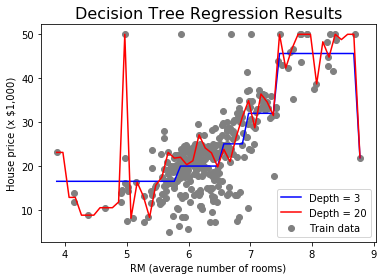

In [48]:
plt.figure()
plt.scatter(X_train['RM'].values, y_train, color='grey')
plt.plot(ps_lin, y_pred_plot, color='blue')
plt.plot(ps_lin, y_pred_overfit_plot, color='red')
plt.title('Decision Tree Regression Results', fontsize=16)
plt.xlabel('RM (average number of rooms)')
plt.ylabel('House price (x $1,000)')
plt.legend(['Depth = 3', 'Depth = 20', 'Train data'])

Happy Machine Learning!